In [13]:
# Analysis of the Raw Data 

import pandas as pd 
import numpy as np

In [14]:
raw_data = pd.read_csv('../../data/raw/ProSeq_raw.csv')

raw_data.head()

,GeneID,Ensembl_ID,CPM_TUMOR,CPM_SPLEEN,ProSeq,Chr
0,DPM1,ENSG00000000419,61.274627,47.583513,AAGCTGCACAGTCGAGCCTGCGGCTCCGCAGCCGAATAGAGCGGAA...,20
1,SCYL3,ENSG00000000457,21.703534,31.948930,GGGGGCAAAACTACTGCATTAATATTAAAATTTTCAAATATTACTT...,1
2,FGR,ENSG00000000938,3.634080,75.151739,ATTACAGGCTGAGCCACTGCCCCCAGCCAGTTACTCAGTTTTTCTA...,1
3,CFH,ENSG00000000971,1.312307,8.308232,TCCAGCATATGATTTATGTTTTCCTTATACATATTACACTACAATA...,1
4,FUCA2,ENSG00000001036,37.855000,31.797871,TCCCAAAGTGTTGGGATTACAGGAGTGAGCCACCGCGCCCGGCCCA...,6


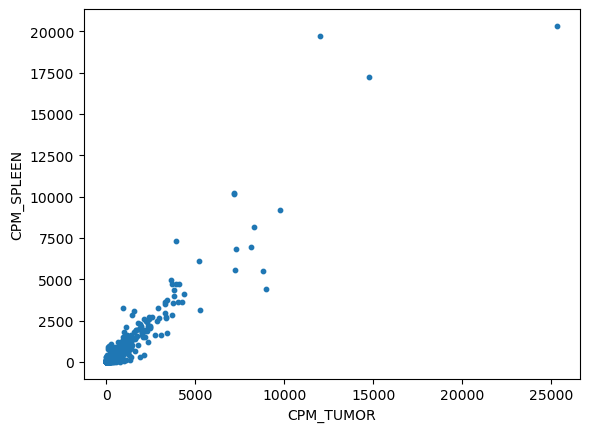

In [15]:
# From memory CPM_TUMOR and CPM_SPLEEN cannot really be compared against each other -> but interesting to see distribution of both

# plot distribution of CPM_TUMOR and CPM_SPLEEN

import pandas as pd
import matplotlib.pyplot as plt

# plot scatter plot of CPM_TUMOR and CPM_SPLEEN with smaller dots
plt.scatter(raw_data['CPM_TUMOR'], raw_data['CPM_SPLEEN'], s=10)
plt.xlabel('CPM_TUMOR')
plt.ylabel('CPM_SPLEEN')
plt.show()



In [17]:
# ok so it seems like we have data that is higly correlated with each other
# would if we looked at CPM_TUMOR / CPM_SPLEEN

# remove values where CPM_TUMOR or CPM_SPLEEN is 0
raw_data = raw_data[raw_data['CPM_TUMOR'] != 0]
raw_data = raw_data[raw_data['CPM_SPLEEN'] != 0]


# plot distribution
raw_data['log(CPM_TUMOR/CPM_SPLEEN)'] = np.log(raw_data['CPM_TUMOR']) - np.log(raw_data['CPM_SPLEEN'])


# key metrics of the data
raw_data['log(CPM_TUMOR/CPM_SPLEEN)'].describe()


count    9495.000000
mean       -0.034544
std         0.697062
min        -4.354320
25%        -0.344595
50%        -0.109529
75%         0.212091
max         6.599989
Name: log(CPM_TUMOR/CPM_SPLEEN), dtype: float64

<Axes: xlabel='log(CPM_TUMOR/CPM_SPLEEN)', ylabel='Count'>

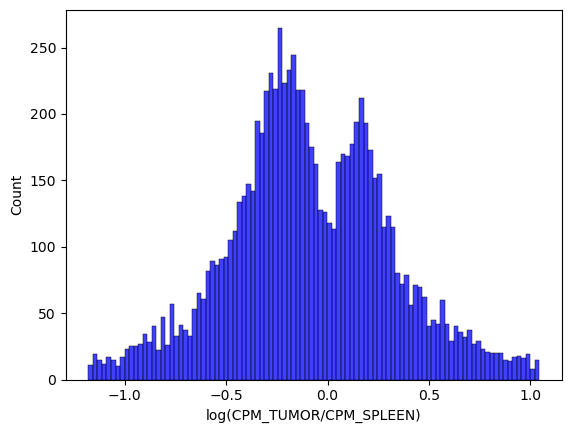

In [18]:
# visualise the data 

# Alternate histogram using seaborn
import seaborn as sns

# remove outliers
# Remove outliers using IQR method
Q1 = raw_data['log(CPM_TUMOR/CPM_SPLEEN)'].quantile(0.25)
Q3 = raw_data['log(CPM_TUMOR/CPM_SPLEEN)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
raw_data = raw_data[(raw_data['log(CPM_TUMOR/CPM_SPLEEN)'] >= lower_bound) & 
                    (raw_data['log(CPM_TUMOR/CPM_SPLEEN)'] <= upper_bound)]


sns.histplot(raw_data['log(CPM_TUMOR/CPM_SPLEEN)'], bins=100, kde=False, color='blue')


In [ ]:
# seems to be bimodal dsitribution
# maybe can do prelim analysis on this data 

# what is the dimension of the data
print(raw_data.shape)

# what is the distribution of the data
print(raw_data.describe())


# save it as a csv
raw_data.to_csv('../../data/processed/ProSeq_raw_filtered.csv', index=False)

# i assume proseq and chr will form the predictors for cpm_tumor/cpm_spleen


(8307, 8)
          CPM_TUMOR    CPM_SPLEEN  CPM_TUMOR/CPM_SPLEEN  \
count   8307.000000   8307.000000           8307.000000   
mean     105.172113    110.028976              0.932929   
std      502.425454    518.420268              0.319688   
min        0.605680      0.830823              0.318989   
25%       12.113600     14.426113              0.708026   
50%       33.009560     36.933869              0.868506   
75%       77.829881     85.763617              1.155485   
max    25322.572550  20325.033160              1.861584   

       log(CPM_TUMOR/CPM_SPLEEN)  
count                8307.000000  
mean                   -0.129427  
std                     0.352254  
min                    -1.142600  
25%                    -0.345275  
50%                    -0.140980  
75%                     0.144520  
max                     0.621428  


In [ ]:
# save the four components of the data 
